Reglas de Asociación

Son técnicas utilizadas para descubrir patrones, relaciones o correlaciones. Por ejmplo: Existe alguna relación entre que compres primero pan y luego leche? Sí, pero con datos demuestralo. 

Probabilidad Condicional

La probabilidad condicional es la probabilidad de que un evento ocurra dado que otro evento ya ha ocurrido. En términos simples, es como preguntar: "¿Cuál es la probabilidad de que pase B, sabiendo que ya pasó A?" 


Este algoritmo esta diseñado para operar sobre bases de datos, que contienen transacciones (articulos comprados por los clientes), donde cada transacción es vista como un conjunto items, el cual es muy usado por los sistemas de recomendación.


In [ ]:
Por ejemplo
pan   leche   mantequilla
1      1       0
1      0       1
1      1       1
0      1       1


Recordemos la siguiente terminología: item,iteamset y transacciones. 

* Item (Artículo): Un objeto o producto individual que puede ser comprado o vendido. Por ejemplo, "pan" o "leche".
* Itemset (Conjunto de Artículos): Un grupo de uno o más artículos. Por ejemplo, {"pan", "leche"}.
* Transacción: Una colección de artículos comprados juntos en una sola operación. Por ejemplo, una transacción podría ser {"pan", "leche", "mantequilla"} si esos artículos fueron comprados juntos.

¿Cuál es el objetivo? Que el algorítmo encuentre items frecuentes, es decir "Si el cliente compra pan y leche, es probable que también compre mantequilla". 


In [3]:
#Cargamos el dataset
import pandas as pd
data = pd.read_csv(r"C:\Users\yetla\Downloads\PYTHON\apriori.csv")
data.columns

Index(['factura', 'stockId', 'producto', 'cantidad', 'fecha', 'monto',
       'cliente'],
      dtype='object')

In [4]:
#Procedemos a eliminar los espacios en blanco
data["producto"] = data["producto"].str.strip()
#Eliminamos las filas que no tienen factura
data.dropna(axis=0, subset=["factura"], inplace=True)
#Procede a convertir la factura en un string
data["factura"] = data["factura"].astype("str")

"""Por ejemplo si tenemos la factura numero 0012 al tratarla como valor numerico lo que sucedera que se ca,bie a 123"""

#Finalmente, procedemos a guardar los datos en un Basket
basket = (data.groupby(["factura", "producto"])["cantidad"]
          .sum().unstack().reset_index().fillna(0)
          .set_index("factura"))

data.head()

,factura,stockId,producto,cantidad,fecha,monto,cliente
0,43659,776,"Mountain-100 Black, 42",1,01/06/2030,2024.994,676
1,43659,777,"Mountain-100 Black, 44",3,01/06/2030,6074.982,676
2,43659,778,"Mountain-100 Black, 48",1,01/06/2030,2024.994,676
3,43659,771,"Mountain-100 Silver, 38",1,01/06/2030,2039.994,676
4,43659,772,"Mountain-100 Silver, 42",1,01/06/2030,2039.994,676


1. Agrupamos por factura y producto. Sin emabrgo, hay que notar que se convierte en indices del DF por la aplicación del GroupBy

2. Procedemos a realizar una suma de las cantidades compradas 

Factura   Producto    Cantidad
0020      Leche        3 
          Pan          5
          Galletas     4

3. Posteriormente aplicamos unstack() con el fin de que los valores de los productos se conviertan en columnas, creando una nueva tabla. Donde cada columna es un producto y las filas facturas. 

 Factura   Leche   Pan  Galletas  Mantequilla
 0020      3       5    4         0

 4. .reset_index permite qye la factura se convierta a una columna en el dataframe en lugar de un índice .
 5. Cuando aplicamos el fillna(0). Se remplaza cualquir valos NaN por un cero.
 


Después de agrupar, seleccionamos la columna cantidad, que es la que inidca cuántas unidades del producto fueron compradas en cada transacción. Además estamos sumando la cantidad de productos para combinación de factura y producto. Si el cliente compro más de una vez en una transacción se sumaran cantidades.

Si un produdcto aparece más de una vez en la misma transacción, se contarán todas la unidades. Procedemos a aplicar el one hot encoding.

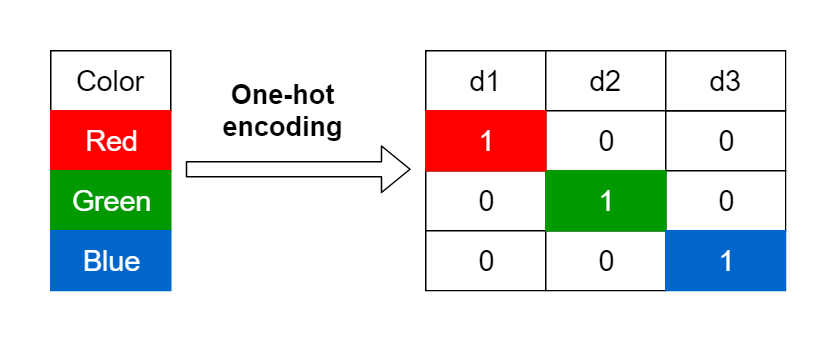


In [5]:
#Procedemos a aplicar el One Hot Encoding
#Aplicammos el hot encode
def hot_encode(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
#Finalmente procedemos a guardar los datos en un Basket
basket_encoded = basket.applymap(hot_encode)
basket = basket_encoded
basket.head()


C:\Users\yetla\AppData\Local\Temp\ipykernel_1948\304141746.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = basket.applymap(hot_encode)


producto,AWC Logo Cap,All-Purpose Bike Stand,Bike Wash - Dissolver,Cable Lock,Chain,"Classic Vest, L","Classic Vest, M","Classic Vest, S",Fender Set - Mountain,Front Brakes,...,"Touring-3000 Yellow, 54","Touring-3000 Yellow, 58","Touring-3000 Yellow, 62",Water Bottle - 30 oz.,"Women's Mountain Shorts, L","Women's Mountain Shorts, M","Women's Mountain Shorts, S","Women's Tights, L","Women's Tights, M","Women's Tights, S"
factura,,,,,,,,,,,,,,,,,,,,,
43659,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43661,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43662,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43663,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


La interpretación que le podemos dar es 0 sino se compro el producto, y 1 si se compró el producto (sin importar cuántas unidades). Posteriormente procedemos a aplicar un concepto llamada mini support: el cual es el umbral minimo de frecuencia. 

Por ejemplo, si min_support= 0.5, signnifica que solo se van a considerar los itemset que aparecen al menos el 50% de las transacciones. 

Transaccion   Productos_comprados
1              Leche, Pan
2              Leche, Manteca
3              Pan, Manteca, Leche
4              Pan
5              Manteca, Leche


Paso 1. Separemos los itemset 
Itemset 1:Leche (4/5) = 0.8
Itemset 2:Pan    (3/5)
Itemset 3:Manteca  (4/5)
Itemset 4:Leche, Pan  (2/5)
Itemset 5:Leche, Manteca (3/5)

Entonces la interpretación que le podemos dar es si aplicamos un min_support = 0.5 entonces, los items frecuentes seran:
Leche = 0.5


In [6]:
#Importamos las librerias necesarias para el modelo
from mlxtend.frequent_patterns import apriori, association_rules
#Dicho la anterior, podemos proceer a crear el modelo
frq_items = apriori(basket, min_support=0.04, use_colnames=True)
#Y Ejecutamos la función utilizada para generar las reglas de asociación
rul = association_rules(frq_items, metric="lift", min_threshold=1)
#Organizamos las reglas de asociación, en orden descendente
"""Confidence y lift son dos métricas que se utilizan para evaluar las reglas de asociación.Confidence nos inidca:
la probabilidad de que se compre el producto A, dado que se ha comprado el producto B. Y lift: nos indica la probabilidad de 
que se compre el producto A y B juntos, en comparación con si se compraran por separado."""
rul = rul.sort_values(["confidence", "lift"], ascending=[False, False])


c:\Users\yetla\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [8]:
print(" Las reglas de Asociación encontrados son :")
display(rul)

 Las reglas de Asociación encontrados son :


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2,(Road Bottle Cage),(Water Bottle - 30 oz.),0.054410,0.148991,0.048339,0.888435,5.963011,1.0,0.040233,7.627893,0.880190,0.311744,0.868902,0.606440
1,(Mountain Bottle Cage),(Water Bottle - 30 oz.),0.064357,0.148991,0.053774,0.835556,5.608096,1.0,0.044185,5.175055,0.878205,0.336985,0.806765,0.598239
0,(Water Bottle - 30 oz.),(Mountain Bottle Cage),0.148991,0.064357,0.053774,0.360922,5.608096,1.0,0.044185,1.464050,0.965544,0.336985,0.316963,0.598239
3,(Water Bottle - 30 oz.),(Road Bottle Cage),0.148991,0.054410,0.048339,0.324445,5.963011,1.0,0.040233,1.399725,0.978015,0.311744,0.285574,0.606440


EJEMPLO CALCULAR LIFT
Transacción   Leche  Pan
1             1      1 
2             1      0 
3             1      1
4             0      1
5             1      1
6             0      0 


Calcular lift entre leche y pan utilizando la expresión matemática.
a). Probabilidad de la intersección 0.5
b). Probabilidad de que se compre leche 0.66
c). Probabilidad de que se compre pan 0.66

lift = 1.14  Esto significa que la compra de leche aumenta que la probabilidad de que se compre pan en un 14% más de lo que ocurriria si fueran independientes.

IMPORTANTE
a. Si el valor lift es mayor que 1, indica que la compra de A y B juntos es más probable que la compra de manera independiente. Pero lift = 1, indica que no hay relación.

b. Confidence, mide la proba. de que el item B sea comprado, dado que el item A se compró.
c. Soporte, mide la frecuecnia con la que aparece un itemset en  todo el conjunto de datos.
d. Average, mide la difencia entre el soporte observado y el soporte esperado si A y B fueran independientes.
e. Conviction, medida que te dice qué tan confiable es la regla. 